In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [37]:
x,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20)

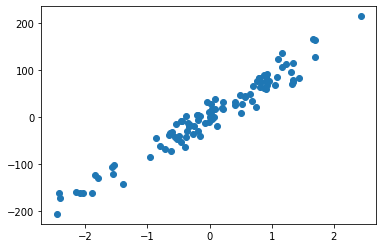

In [38]:
plt.scatter(x,y)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lr=LinearRegression()

In [41]:
lr.fit(x,y)

LinearRegression()

In [42]:
lr.coef_

array([78.06598431])

In [43]:
lr.intercept_

3.1412082281402496

In [13]:
m = 16.954

In [148]:
class GDRegressor:

  def __init__(self,learning_rate,epochs):
    self.m=100
    self.b=0
    self.lr=learning_rate
    self.epochs=epochs
  
  def fit(self,x,y):
    for i in range(self.epochs):
      loss_slope_b = -2 * np.sum(y-self.m*x.ravel()-self.b)
      loss_slope_m = -2 * np.sum((y-self.m*x.ravel()-self.b)*x.ravel())


      self.b = self.b - (self.lr*loss_slope_b)
      self.m = self.m - (self.lr*loss_slope_m)

    print(self.b)
    print(self.m)

  def predict(self,x):
    return self.m*x + self.b

In [164]:
t=GDRegressor(learning_rate=0.005,epochs=5)

In [165]:


t.fit(x,y)

3.1412048389372256
78.06597559742329


In [151]:


t.m

78.06598431484437

In [152]:
t.b

3.1412082281402487

In [153]:
lr.fit(x,y)

LinearRegression()

In [154]:
lr.intercept_

3.1412082281402496

In [155]:
lr.coef_

array([78.06598431])

In [157]:
y_pred=t.predict(x)

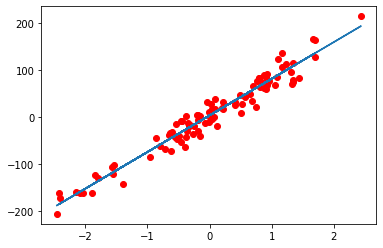

In [159]:
plt.plot(x,y_pred)
plt.scatter(x,y,color='red')


In [166]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [167]:
x,y=load_diabetes(return_X_y=True)

In [169]:
print(x.shape)
print(y.shape)


(442, 10)
(442,)


In [170]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [172]:
reg=LinearRegression()

In [173]:
reg.fit(x_train,y_train)

LinearRegression()

In [175]:
y_pred=reg.predict(x_test)

In [176]:
r2_score(y_test,y_pred)

0.4399387660024644

In [205]:
class BGDRegressor:
###Batch gradient descent
  def __init__(self,learning_rate=0.01,epochs=100):
    self.coef_ = None
    self.intercept_ = None
    self.lr=learning_rate
    self.epochs=epochs

  def fit(self,x_train,y_train):

    self.intercept_ = 0 
    self.coef_ = np.ones(x_train.shape[1])

    for i in range(self.epochs):
      y_hat= np.dot(x_train,self.coef_) + self.intercept_
      intercept_der= -2*np.mean(y_train-y_hat)
      coef_der= -2*(np.dot((y_train-y_hat).T, x_train)/x_train.shape[0])
      self.intercept_ = self.intercept_ - (self.lr*intercept_der)
      self.coef_ = self.coef_  -  (self.lr*coef_der)



  def predict(self,x_test):
    return np.dot(x_test,self.coef_) + self.intercept_

In [230]:
gdr=BGDRegressor(0.24,1000)

In [231]:
gdr.fit(x_train,y_train)

In [232]:
gdr.coef_

array([  45.9899602 ,  -98.74529536,  399.5226045 ,  276.27600506,
         -0.42944348,  -57.03306333, -184.15410037,  124.76815527,
        360.80355986,  125.85989452])

In [233]:
reg.coef_

array([  -9.16088483, -205.46225988,  516.68462383,  340.62734108,
       -895.54360867,  561.21453306,  153.88478595,  126.73431596,
        861.12139955,   52.41982836])

In [234]:
v=gdr.predict(x_test)

In [235]:
r2_score(y_test,v)

0.44587207158452824

In [238]:
##stochstic gradient descent

In [239]:
class sgdregressor:

  def __init__(self,learning_rate=0.01,epochs=20):
    self.coef=None
    self.intercept=None
    self.lr=learning_rate
    self.epochs=epochs

  def fit(self,x_train,y_train):

    self.intercept=0
    self.coef=np.ones(x_train.shape[1])


    for i in range(self.epochs):

      for j in range(x_train.shape[0]):
        idx=np.random.randint(0,x_train.shape[0])
        y_hat= np.dot(x_train[idx],self.coef) + self.intercept
        intercept_der= -2* (y_train[idx]-y_hat)
        coef_der= -2* np.dot((y_train[idx]-y_hat),x_train[idx])
        self.intercept= self.intercept - (self.lr*intercept_der)
        self.coef= self.coef - (self.lr*coef_der)

  def predict(self,x_test):
    return np.dot(x_test,self.coef) + self.intercept

In [308]:
s=sgdregressor(learning_rate=0.0901,epochs=5)

In [309]:
s.fit(x_train,y_train)

In [310]:
y_pred=s.predict(x_test)

In [311]:
r2_score(y_test,y_pred)

0.4356724010598777

In [312]:
##when to use-
#1. big data
##2.non convex function

In [389]:
# t0,t1=5,50
# def learning_rate(t):
#   return t0/(t+t1)


# for i in range(epochs):
#   for j in range(x.shape[0]):

#     lr=learning_rate(i*x.shape[0] + j )


In [382]:
class sgdregressor1:

  def __init__(self,learning_rate=0.01,epochs=20):
    self.coef=None
    self.intercept=None
    self.lr=learning_rate
    self.epochs=epochs

  def fit(self,x_train,y_train):

    self.intercept=0
    self.coef=np.ones(x_train.shape[1])
    t0,t1=5,50
    def learning_rater(t):
       return t0/(t+t1)

    
    for i in range(self.epochs):
      

      for j in range(x_train.shape[0]):
        idx=np.random.randint(0,x_train.shape[0])
        y_hat= np.dot(x_train[idx],self.coef) + self.intercept
        intercept_der= -2* (y_train[idx]-y_hat)
        coef_der= -2* np.dot((y_train[idx]-y_hat),x_train[idx])
        self.intercept= self.intercept - (self.lr*intercept_der)
        self.coef= self.coef - (self.lr*coef_der)
        self.lr=learning_rater(i*x_train.shape[0] + j )

    print(self.lr)
  def predict(self,x_test):
    return np.dot(x_test,self.coef) + self.intercept

In [383]:
s=sgdregressor1(learning_rate=0.01,epochs=1)


In [384]:
s.fit(x_train,y_train)


0.012437810945273632


In [385]:
y_pred=s.predict(x_test)


In [386]:

r2_score(y_test,y_pred)


0.11858132771791707

In [388]:
from sklearn.linear_model import SGDRegressor

In [393]:
e=SGDRegressor(max_iter=1000,learning_rate='constant',eta0=0.01)

In [394]:
e.fit(x_train,y_train)

SGDRegressor(learning_rate='constant')

In [395]:
y_pred=e.predict(x_test)

In [396]:
r2_score(y_test,y_pred)

0.44306184432637385